In [3]:
#k-means: quickly discovering insights from unlabeled data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import plotly.express as px

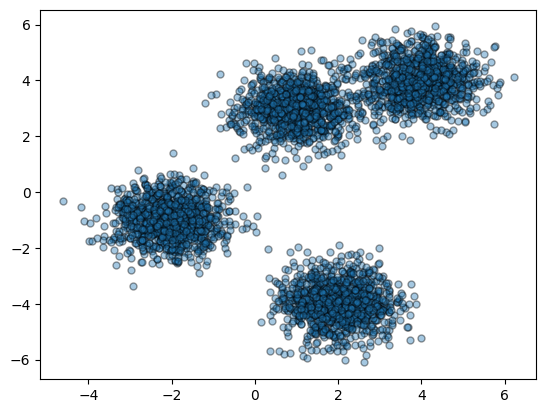

In [4]:
#set a random dataset
np.random.seed(0)
X,y = make_blobs(n_samples=4000, centers=[[4,4],[-2,-1],[2,-4],[1,3]], cluster_std=0.7)
plt.scatter(X[:, 0],X[:, 1], marker='.',alpha=0.4, ec='k',s=100)
#alpha: level of transparency,  ec: draw a thin black edge around each dot,   s: size of dot


In [5]:
#setting up k-means
k_means= KMeans(init="k-means++",n_clusters=4,n_init=12)
   #"k-means":smarter way to pick the first cluster centers
   #n_init =12:run the algorithm 12 times with different starting points and pick the best
k_means.fit(X) #looks at X data and find 4 groups in it.
k_means_labels = k_means.labels_  #gives label for each dot in data
print(k_means_labels)  #output shows cluster name as 0,1,2,3
k_means_cluster_centers = k_means.cluster_centers_  #gives the coordinates of center of each cluster
k_means_cluster_centers

[3 1 1 ... 3 1 2]


array([[-2.0519844 , -1.00278419],
       [ 0.99048735,  2.96976155],
       [ 1.99792766, -3.99128764],
       [ 3.97558613,  3.9845842 ]])

[False False False ... False False False]
[-2.0519844  -1.00278419]
[False  True  True ... False  True False]
[0.99048735 2.96976155]
[False False False ... False False  True]
[ 1.99792766 -3.99128764]
[ True False False ...  True False False]
[3.97558613 3.9845842 ]


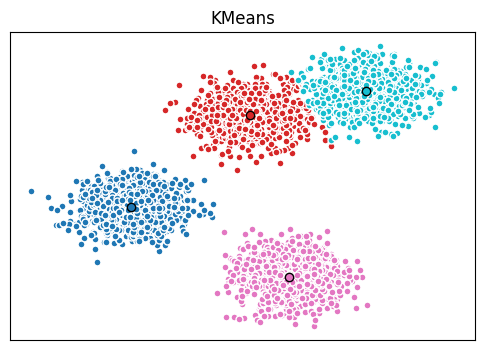

: 

In [ ]:
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    print(my_members)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    print(cluster_center)

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
